# Autoencoder NN for reducing the latent space needed to represent the co-rds of an equilateral triangular molecule






### Libraries and functions

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import pandas as pd
import mpl_toolkits.mplot3d as plt3d

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, UpSampling1D, Input

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

In [2]:
#Function which plots the 3D traingle

def Plot_2(v1, v2, v3, vv1, vv2, vv3):
  fig = plt.figure()
  fig.set_size_inches(5,5)
  ax = fig.add_subplot(111, projection='3d')
  
  X = np.array([v1,v2,v3])
  Y = np.array([vv1,vv2,vv3])
  
  l0x, ll0x = np.linspace(v1[0], v2[0], 50), np.linspace(vv1[0], vv2[0], 50)
  l1x, ll1x = np.linspace(v2[0], v3[0], 50), np.linspace(vv2[0], vv3[0], 50)
  l2x, ll2x = np.linspace(v3[0], v1[0], 50), np.linspace(vv3[0], vv1[0], 50)
  l0y, ll0y = np.linspace(v1[1], v2[1], 50), np.linspace(vv1[1], vv2[1], 50)
  l1y, ll1y = np.linspace(v2[1], v3[1], 50), np.linspace(vv2[1], vv3[1], 50)
  l2y, ll2y = np.linspace(v3[1], v1[1], 50), np.linspace(vv3[1], vv1[1], 50)
  l0z, ll0z = np.linspace(v1[2], v2[2], 50), np.linspace(vv1[2], vv2[2], 50)
  l1z, ll1z = np.linspace(v2[2], v3[2], 50), np.linspace(vv2[2], vv3[2], 50)
  l2z, ll2z = np.linspace(v3[2], v1[2], 50), np.linspace(vv3[2], vv1[2], 50)

  #Drawing lines
  ax.scatter(l0x, l0y, l0z, color='red', marker='s', s = 1, alpha = 0.1)
  ax.scatter(l1x, l1y, l1z, color='red', marker='s', s = 1, alpha = 0.1)
  ax.scatter(l2x, l2y, l2z, color='red', marker='s', s = 1, alpha = 0.1)
  ax.scatter(ll0x, ll0y, ll0z, color='black', marker='s', s = 1, alpha = 0.1)
  ax.scatter(ll1x, ll1y, ll1z, color='black', marker='s', s = 1, alpha = 0.1)
  ax.scatter(ll2x, ll2y, ll2z, color='black', marker='s', s = 1, alpha = 0.1)

  #plot the nodes
  for x, y, z in X:
    ax.scatter(x, y, z, color='red', marker='o', s=30)
  for x, y, z in Y:
    ax.scatter(x, y, z, color='black', marker='o', s=30)

  ax.scatter(0, 0, 0, color='blue', marker='s', s = 0.01 )
  ax.scatter(1, 0, 0, color='blue', marker='s', s = 0.01 )
  ax.scatter(0, 1, 0, color='blue', marker='s', s = 0.01 )
  ax.scatter(0, 0, 1, color='blue', marker='s', s = 0.01 )
  ax.scatter(1, 1, 1, color='blue', marker='s', s = 0.01 )

## 1. Creating a dataset of triangular molecules in 3-D space represented by 9 cordinates

### Creating some functions to create a dataset of equilateral triangles.


In [ ]:
#Functiions for generating a randomly rotated+translated triangle 
from scipy.spatial.transform import Rotation as R

#r = standard euler angles vector, degrees
def Rotation(v1, v2, v3, r): 
  r = R.from_rotvec( r )

  v_1r = r.apply(v1)
  v_2r = r.apply(v2)
  v_3r = r.apply(v3)
  
  return v_1r, v_2r, v_3r

def Rotate_translate(v1_in, v2_in, v3_in, a):
  r = np.array(2*np.pi*np.random.random_sample((3,))) #Random rotation vector
  t = np.array(np.random.random_sample((3,))) + a     #Random translation vector, +a is to keep all terms positive and avoid 0

  return Rotation(v1_in, v2_in, v3_in, r) + t #Vector rotated and translated in space

In [ ]:
def random_init_vecs(v10, v20, v30):
  ran = np.random.randint(0,6)
  
  if ran == 0:
    return v10,v20,v30
  elif ran ==1:
    return v10,v30,v20
  elif ran ==2:
    return v20,v10,v30
  elif ran ==3:
    return v20,v30,v10
  elif ran ==4:
    return v30,v20,v10
  elif ran ==5:
    return v30,v10,v20

***random_init_vecs*** is so there is no bias in the dataset arising from initializing the vectors. (so that the NN does not find a symmetry in the initialisation of the vectors)



### Creating a random dataset of triangular points with side lenght a.

In [ ]:
a=1.
DATA_SIZE = 200000

This cell generates input data. In the format of a panda dataframe where each index corrosponds to 3 coordinates (9 datapoints).

In [ ]:
df=pd.DataFrame(columns=['x1','y1','z1','x2','y2','z2','x3','y3','z3'])

for i in range(DATA_SIZE):
  #v1_in, v2_in, v3_in = random_init_vecs(np.array([0,0,0]), np.array([a/2., (3**0.5)*a/2., 0]) ,np.array([a, 0, 0]))
  #v1_rt, v2_rt, v3_rt = Rotate_translate(v1_in, v2_in, v3_in, a)
  v1_rt, v2_rt, v3_rt = np.random.rand(3,3)
  df = df.append({'x1':v1_rt[0], 'y1':v1_rt[1], 'z1':v1_rt[2],'x2':v2_rt[0],'y2':v2_rt[1],'z2':v2_rt[2],'x3':v3_rt[0],'y3':v3_rt[1],'z3':v3_rt[2]}, ignore_index=True)
  
df


,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,0.937820,0.492940,0.481953,0.932908,0.880206,0.534560,0.663734,0.444456,0.767875
1,0.221614,0.054295,0.501995,0.378510,0.470033,0.254971,0.752407,0.240817,0.369657
2,0.990716,0.903408,0.065735,0.442872,0.020445,0.905702,0.272991,0.365796,0.880280
3,0.197878,0.377531,0.140867,0.570046,0.846269,0.168658,0.055345,0.247188,0.891811
4,0.607613,0.151385,0.904398,0.645211,0.126438,0.306748,0.660249,0.765139,0.660250
...,...,...,...,...,...,...,...,...,...
199995,0.686349,0.931257,0.935014,0.283421,0.301688,0.556883,0.903842,0.535105,0.347680
199996,0.290775,0.363987,0.251081,0.734532,0.555610,0.421014,0.508913,0.789710,0.092839
199997,0.242561,0.560856,0.963989,0.056497,0.797959,0.671500,0.263665,0.271850,0.238582
199998,0.759511,0.563079,0.645149,0.736917,0.384477,0.605884,0.091227,0.510273,0.556547


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cd
df.to_csv('/content/drive/My Drive/Project/Autoencoder triangular molecule/training/training_size' + str(DATA_SIZE)+".csv", index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: ignored

## 2. Processing data for the NN


This cell is for importing larger datasets from google drive instead of remaking them.

In [7]:
from google.colab import drive
drive.mount('/content/drive')
!cd
DATA_SIZE = 200000
df = pd.read_csv('/content/drive/My Drive/Project/Autoencoder triangular molecule/training/training_size' + str(DATA_SIZE)+".csv")
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
              x1        y1        z1  ...        x3        y3        z3
0       0.937820  0.492940  0.481953  ...  0.663734  0.444456  0.767875
1       0.221614  0.054295  0.501995  ...  0.752407  0.240817  0.369657
2       0.990716  0.903408  0.065735  ...  0.272991  0.365796  0.880280
3       0.197878  0.377531  0.140867  ...  0.055345  0.247188  0.891811
4       0.607613  0.151385  0.904398  ...  0.660249  0.765139  0.660250
...          ...       ...       ...  ...       ...       ...       ...
199995  0.686349  0.931257  0.935014  ...  0.903842  0.535105  0.347680
199996  0.290775  0.363987  0.251081  ...  0.508913  0.789710  0.092839
199997  0.242561  0.560856  0.963989  ...  0.263665  0.271850  0.238582
199998  0.759511  0.563079  0.645149  ...  0.091227  0.510273  0.556547
199999  0.508598  0.139544  0.345626  ...  0.770041  0.897976  0.144882

[20000

In [8]:
# Loading the data into np arrays from dataframes
x_train = df.to_numpy()

# Splitting the array into validation, training, and test sets
x_train, x_val = train_test_split(x_train, test_size = 0.1)
x_train, x_test = train_test_split(x_train, test_size = 1./9.)

print(len(x_train),len(x_test), len(x_val))

160000 20000 20000


In [9]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(160000, 9)
(20000, 9)
(20000, 9)


## Layers 9-9-9


###Building the model

In [ ]:
latent_dim = 9
input_img = Input(shape=(9,))

# Econder
x = Dense(9, activation='sigmoid')(input_img)

encoded = Dense(latent_dim, activation='relu')(x)

# Decoder
decoded = Dense(9, activation='sigmoid')(encoded)

# Model
autoencoder = Model(input_img, decoded)

# Visualise the model
autoencoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_7 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_8 (Dense)              (None, 9)                 90        
Total params: 270
Trainable params: 270
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [ ]:
autoencoder.compile(optimizer='rmsprop', loss='mse', metrics =['accuracy'])

### Training the model

In [ ]:
history = autoencoder.fit(x_train, x_train,     # For autoencoders input data = target data
                epochs=20,
                batch_size=256,
                validation_data=(x_val, x_val),
                verbose = 2
                )

Epoch 1/20
625/625 - 1s - loss: 0.0711 - accuracy: 0.2505 - val_loss: 0.0565 - val_accuracy: 0.3250
Epoch 2/20
625/625 - 0s - loss: 0.0472 - accuracy: 0.3740 - val_loss: 0.0401 - val_accuracy: 0.4171
Epoch 3/20
625/625 - 0s - loss: 0.0341 - accuracy: 0.4696 - val_loss: 0.0300 - val_accuracy: 0.5045
Epoch 4/20
625/625 - 1s - loss: 0.0284 - accuracy: 0.5218 - val_loss: 0.0277 - val_accuracy: 0.5297
Epoch 5/20
625/625 - 1s - loss: 0.0274 - accuracy: 0.5303 - val_loss: 0.0271 - val_accuracy: 0.5321
Epoch 6/20
625/625 - 0s - loss: 0.0264 - accuracy: 0.5293 - val_loss: 0.0250 - val_accuracy: 0.5358
Epoch 7/20
625/625 - 1s - loss: 0.0221 - accuracy: 0.5599 - val_loss: 0.0194 - val_accuracy: 0.5959
Epoch 8/20
625/625 - 0s - loss: 0.0188 - accuracy: 0.5961 - val_loss: 0.0186 - val_accuracy: 0.5972
Epoch 9/20
625/625 - 0s - loss: 0.0185 - accuracy: 0.5919 - val_loss: 0.0184 - val_accuracy: 0.5947
Epoch 10/20
625/625 - 0s - loss: 0.0183 - accuracy: 0.5890 - val_loss: 0.0182 - val_accuracy: 0.5925

### Evaluation

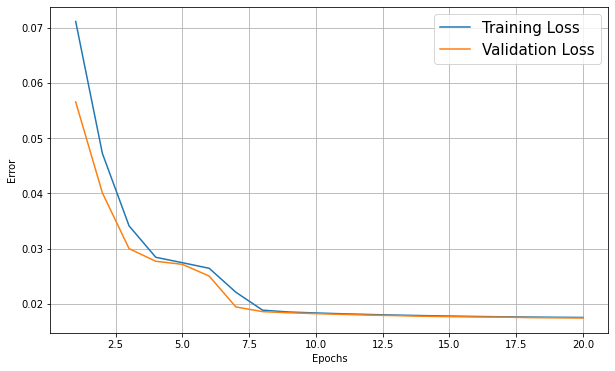

In [ ]:
# Plot Training Loss and Validation Loss

plt.figure(figsize=(10,6))
plt.plot(range(1, len(history.history['loss'])+1,1), history.history['loss'], label='Training Loss')
plt.plot(range(1, len(history.history['val_loss'])+1,1), history.history['val_loss'], label='Validation Loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid()

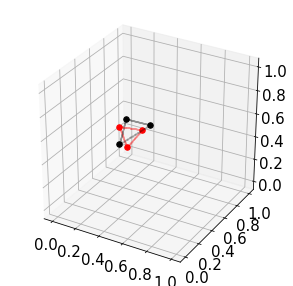

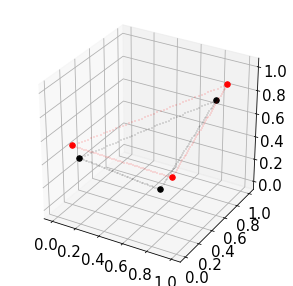

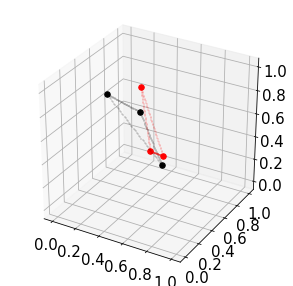

In [ ]:
# Reconstruct test images
reconstructed = autoencoder.predict(x_test)

for i in range(3):
    # Display original and reconstructed
    vx,vy,vz = np.array_split(x_test[i] , 3)
    vvx,vvy,vvz = np.array_split(reconstructed[i] , 3)
    Plot_2(vx,vy,vz,vvx,vvy,vvz)

## Layers 9-7-9


###Building the model

In [ ]:
latent_dim = 7
input_img = Input(shape=(9,))

# Econder
x = Dense(9, activation='sigmoid')(input_img)

encoded = Dense(latent_dim, activation='relu')(x)

# Decoder
decoded = Dense(9, activation='sigmoid')(encoded)

# Model
autoencoder = Model(input_img, decoded)

# Visualise the model
autoencoder.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 70        
_________________________________________________________________
dense_11 (Dense)             (None, 9)                 72        
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [ ]:
autoencoder.compile(optimizer='rmsprop', loss='mse', metrics =['accuracy'])

### Training the model

In [ ]:
history = autoencoder.fit(x_train, x_train,     # For autoencoders input data = target data
                epochs=20,
                batch_size=256,
                validation_data=(x_val, x_val),
                verbose = 2
                )

Epoch 1/20
625/625 - 1s - loss: 0.0742 - accuracy: 0.2293 - val_loss: 0.0634 - val_accuracy: 0.2856
Epoch 2/20
625/625 - 1s - loss: 0.0565 - accuracy: 0.3131 - val_loss: 0.0498 - val_accuracy: 0.3528
Epoch 3/20
625/625 - 1s - loss: 0.0451 - accuracy: 0.3776 - val_loss: 0.0396 - val_accuracy: 0.4186
Epoch 4/20
625/625 - 1s - loss: 0.0377 - accuracy: 0.4177 - val_loss: 0.0366 - val_accuracy: 0.4275
Epoch 5/20
625/625 - 1s - loss: 0.0368 - accuracy: 0.4181 - val_loss: 0.0364 - val_accuracy: 0.4261
Epoch 6/20
625/625 - 1s - loss: 0.0366 - accuracy: 0.4176 - val_loss: 0.0363 - val_accuracy: 0.4257
Epoch 7/20
625/625 - 1s - loss: 0.0366 - accuracy: 0.4170 - val_loss: 0.0362 - val_accuracy: 0.4261
Epoch 8/20
625/625 - 1s - loss: 0.0365 - accuracy: 0.4160 - val_loss: 0.0361 - val_accuracy: 0.4227
Epoch 9/20
625/625 - 1s - loss: 0.0364 - accuracy: 0.4160 - val_loss: 0.0361 - val_accuracy: 0.4232
Epoch 10/20
625/625 - 1s - loss: 0.0364 - accuracy: 0.4151 - val_loss: 0.0361 - val_accuracy: 0.4219

### Evaluation

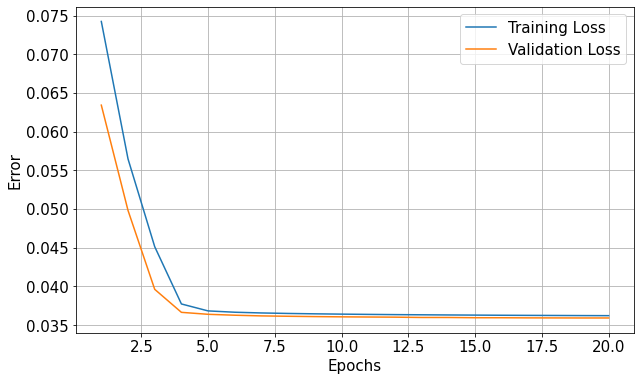

In [ ]:
# Plot Training Loss and Validation Loss

plt.figure(figsize=(10,6))
plt.plot(range(1, len(history.history['loss'])+1,1), history.history['loss'], label='Training Loss')
plt.plot(range(1, len(history.history['val_loss'])+1,1), history.history['val_loss'], label='Validation Loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid()

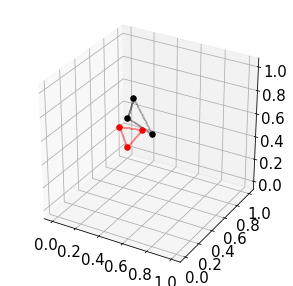

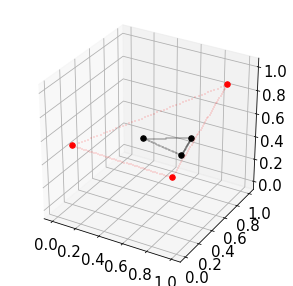

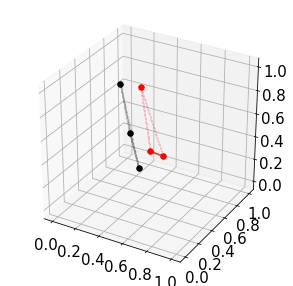

In [ ]:
# Reconstruct test images
reconstructed = autoencoder.predict(x_test)

for i in range(3):
    # Display original and reconstructed
    vx,vy,vz = np.array_split(x_test[i] , 3)
    vvx,vvy,vvz = np.array_split(reconstructed[i] , 3)
    Plot_2(vx,vy,vz,vvx,vvy,vvz)

## Layers 9-8-7-8-9


###Building the model

In [ ]:
latent_dim = 7
input_img = Input(shape=(9,))

# Econder
x = Dense(9, activation='sigmoid')(input_img)

x = Dense(8, activation='relu')(x)

encoded = Dense(latent_dim, activation='sigmoid')(x)

# Decoder
x = Dense(8, activation='relu')(encoded)

decoded = Dense(9, activation='sigmoid')(x)

# Model
autoencoder = Model(input_img, decoded)

# Visualise the model
autoencoder.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_30 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 80        
_________________________________________________________________
dense_32 (Dense)             (None, 7)                 63        
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 64        
_________________________________________________________________
dense_34 (Dense)             (None, 9)                 81        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_______________________________________________________

### Compiling the model

In [ ]:
autoencoder.compile(optimizer='rmsprop', loss='mse', metrics =['accuracy'])

### Training the model

In [ ]:
history = autoencoder.fit(x_train, x_train,     # For autoencoders input data = target data
                epochs=100,
                batch_size=64,
                validation_data=(x_val, x_val),
                verbose = 2
                )

Epoch 1/100
625/625 - 1s - loss: 0.0761 - accuracy: 0.2058 - val_loss: 0.0648 - val_accuracy: 0.2497
Epoch 2/100
625/625 - 1s - loss: 0.0597 - accuracy: 0.2889 - val_loss: 0.0559 - val_accuracy: 0.3092
Epoch 3/100
625/625 - 1s - loss: 0.0531 - accuracy: 0.3264 - val_loss: 0.0469 - val_accuracy: 0.3663
Epoch 4/100
625/625 - 1s - loss: 0.0464 - accuracy: 0.3661 - val_loss: 0.0463 - val_accuracy: 0.3677
Epoch 5/100
625/625 - 1s - loss: 0.0461 - accuracy: 0.3673 - val_loss: 0.0461 - val_accuracy: 0.3685
Epoch 6/100
625/625 - 1s - loss: 0.0458 - accuracy: 0.3691 - val_loss: 0.0454 - val_accuracy: 0.3704
Epoch 7/100
625/625 - 1s - loss: 0.0415 - accuracy: 0.3979 - val_loss: 0.0377 - val_accuracy: 0.4210
Epoch 8/100
625/625 - 1s - loss: 0.0371 - accuracy: 0.4237 - val_loss: 0.0373 - val_accuracy: 0.4214
Epoch 9/100
625/625 - 1s - loss: 0.0369 - accuracy: 0.4246 - val_loss: 0.0371 - val_accuracy: 0.4212
Epoch 10/100
625/625 - 1s - loss: 0.0368 - accuracy: 0.4251 - val_loss: 0.0370 - val_accura

### Evaluation

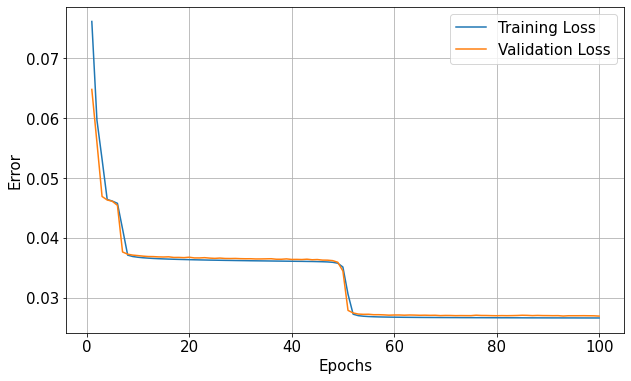

In [ ]:
# Plot Training Loss and Validation Loss

plt.figure(figsize=(10,6))
plt.plot(range(1, len(history.history['loss'])+1,1), history.history['loss'], label='Training Loss')
plt.plot(range(1, len(history.history['val_loss'])+1,1), history.history['val_loss'], label='Validation Loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid()

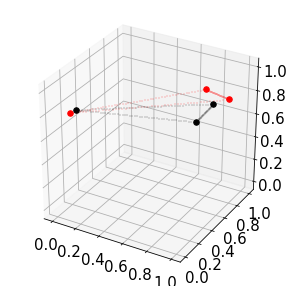

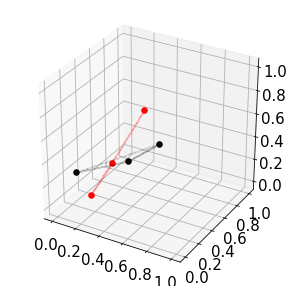

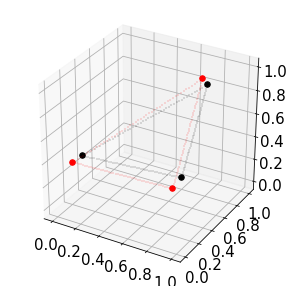

In [ ]:
# Reconstruct test images
reconstructed = autoencoder.predict(x_test)

for i in range(3):
    # Display original and reconstructed
    vx,vy,vz = np.array_split(x_test[i] , 3)
    vvx,vvy,vvz = np.array_split(reconstructed[i] , 3)
    Plot_2(vx,vy,vz,vvx,vvy,vvz)

## Layers 9-512-7-512-9


###Building the model

In [ ]:
latent_dim = 7
input_img = Input(shape=(9,))

# Econder
x = Dense(9, activation='sigmoid')(input_img)

x = Dense(512, activation='relu')(x)

encoded = Dense(latent_dim, activation='sigmoid')(x)

# Decoder
x = Dense(512, activation='relu')(encoded)

decoded = Dense(9, activation='sigmoid')(x)

# Model
autoencoder = Model(input_img, decoded)

# Visualise the model
autoencoder.summary()

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 9)]               0         
_________________________________________________________________
dense_61 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_62 (Dense)             (None, 512)               5120      
_________________________________________________________________
dense_63 (Dense)             (None, 7)                 3591      
_________________________________________________________________
dense_64 (Dense)             (None, 512)               4096      
_________________________________________________________________
dense_65 (Dense)             (None, 9)                 4617      
Total params: 17,514
Trainable params: 17,514
Non-trainable params: 0
_________________________________________________

### Compiling the model

In [ ]:
autoencoder.compile(optimizer='rmsprop', loss='mse', metrics =['accuracy'])

### Training the model

In [ ]:
history = autoencoder.fit(x_train, x_train,     # For autoencoders input data = target data
                epochs=100,
                batch_size=64,
                validation_data=(x_val, x_val),
                verbose = 2
                )

Epoch 1/100
2500/2500 - 3s - loss: 0.0426 - accuracy: 0.4050 - val_loss: 0.0283 - val_accuracy: 0.4906
Epoch 2/100
2500/2500 - 3s - loss: 0.0279 - accuracy: 0.4994 - val_loss: 0.0271 - val_accuracy: 0.5107
Epoch 3/100
2500/2500 - 3s - loss: 0.0264 - accuracy: 0.5098 - val_loss: 0.0258 - val_accuracy: 0.5138
Epoch 4/100
2500/2500 - 3s - loss: 0.0214 - accuracy: 0.5553 - val_loss: 0.0156 - val_accuracy: 0.6115
Epoch 5/100
2500/2500 - 3s - loss: 0.0144 - accuracy: 0.6106 - val_loss: 0.0131 - val_accuracy: 0.6067
Epoch 6/100
2500/2500 - 3s - loss: 0.0124 - accuracy: 0.6160 - val_loss: 0.0118 - val_accuracy: 0.6224
Epoch 7/100
2500/2500 - 3s - loss: 0.0112 - accuracy: 0.6183 - val_loss: 0.0110 - val_accuracy: 0.6140
Epoch 8/100
2500/2500 - 3s - loss: 0.0104 - accuracy: 0.6173 - val_loss: 0.0103 - val_accuracy: 0.6071
Epoch 9/100
2500/2500 - 3s - loss: 0.0099 - accuracy: 0.6207 - val_loss: 0.0097 - val_accuracy: 0.6137
Epoch 10/100
2500/2500 - 3s - loss: 0.0094 - accuracy: 0.6231 - val_loss:

### Evaluation

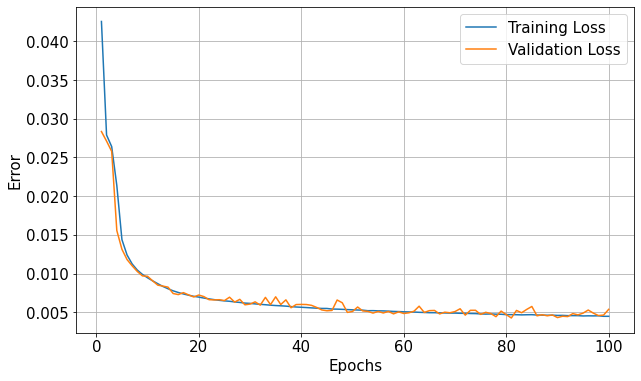

In [ ]:
# Plot Training Loss and Validation Loss

plt.figure(figsize=(10,6))
plt.plot(range(1, len(history.history['loss'])+1,1), history.history['loss'], label='Training Loss')
plt.plot(range(1, len(history.history['val_loss'])+1,1), history.history['val_loss'], label='Validation Loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid()

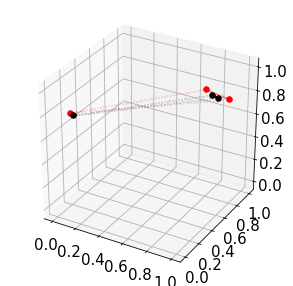

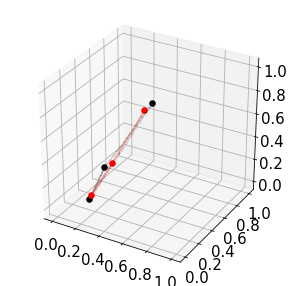

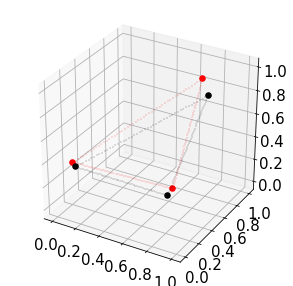

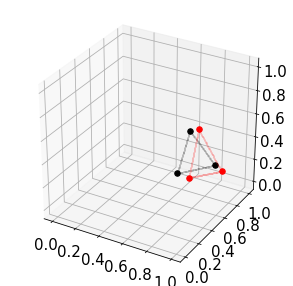

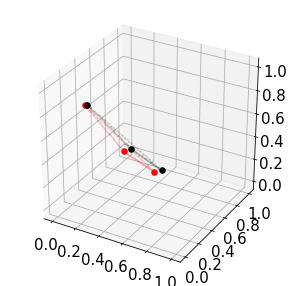

In [ ]:
# Reconstruct test images
reconstructed = autoencoder.predict(x_test)

for i in range(5):
    # Display original and reconstructed
    vx,vy,vz = np.array_split(x_test[i] , 3)
    vvx,vvy,vvz = np.array_split(reconstructed[i] , 3)
    Plot_2(vx,vy,vz,vvx,vvy,vvz)

## Layers 9-512-64-7-512-9


###Building the model

In [ ]:
latent_dim = 7
input_img = Input(shape=(9,))

# Econder
x = Dense(9, activation='sigmoid')(input_img)

x = Dense(64, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)

encoded = Dense(latent_dim, activation='sigmoid')(x)

# Decoder
x = Dense(64, activation='relu')(encoded)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)

decoded = Dense(9, activation='sigmoid')(x)

# Model
autoencoder = Model(input_img, decoded)

# Visualise the model
autoencoder.summary()

Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 9)]               0         
_________________________________________________________________
dense_66 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_67 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_68 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_69 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_70 (Dense)             (None, 7)                 455       
_________________________________________________________________
dense_71 (Dense)             (None, 64)              

### Compiling the model

In [ ]:
autoencoder.compile(optimizer='rmsprop', loss='mse', metrics =['accuracy'])

### Training the model

In [ ]:
history = autoencoder.fit(x_train, x_train,     # For autoencoders input data = target data
                epochs=100,
                batch_size=64,
                validation_data=(x_val, x_val),
                verbose = 2
                )

Epoch 1/100


KeyboardInterrupt: ignored

### Evaluation

In [ ]:
# Plot Training Loss and Validation Loss

plt.figure(figsize=(10,6))
plt.plot(range(1, len(history.history['loss'])+1,1), history.history['loss'], label='Training Loss')
plt.plot(range(1, len(history.history['val_loss'])+1,1), history.history['val_loss'], label='Validation Loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid()

In [ ]:
# Reconstruct test images
reconstructed = autoencoder.predict(x_test)

for i in range(5):
    # Display original and reconstructed
    vx,vy,vz = np.array_split(x_test[i] , 3)
    vvx,vvy,vvz = np.array_split(reconstructed[i] , 3)
    Plot_2(vx,vy,vz,vvx,vvy,vvz)

## Layers 9-512-64-6-512-9


###Building the model

In [ ]:
latent_dim = 6
input_img = Input(shape=(9,))

# Econder
x = Dense(9, activation='sigmoid')(input_img)

x = Dense(64, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)

encoded = Dense(latent_dim, activation='sigmoid')(x)

# Decoder
x = Dense(64, activation='relu')(encoded)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)

decoded = Dense(9, activation='sigmoid')(x)

# Model
autoencoder = Model(input_img, decoded)

# Visualise the model
autoencoder.summary()

Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 9)]               0         
_________________________________________________________________
dense_75 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_76 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_77 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_78 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_79 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_80 (Dense)             (None, 64)              

### Compiling the model

In [ ]:
autoencoder.compile(optimizer='rmsprop', loss='mse', metrics =['accuracy'])

### Training the model

In [ ]:
history = autoencoder.fit(x_train, x_train,     # For autoencoders input data = target data
                epochs=100,
                batch_size=64,
                validation_data=(x_val, x_val),
                verbose = 2
                )

Epoch 1/100
2500/2500 - 6s - loss: 0.0532 - accuracy: 0.3314 - val_loss: 0.0425 - val_accuracy: 0.4074
Epoch 2/100
2500/2500 - 6s - loss: 0.0308 - accuracy: 0.4621 - val_loss: 0.0252 - val_accuracy: 0.5038
Epoch 3/100
2500/2500 - 6s - loss: 0.0221 - accuracy: 0.5158 - val_loss: 0.0210 - val_accuracy: 0.5320
Epoch 4/100
2500/2500 - 6s - loss: 0.0175 - accuracy: 0.5436 - val_loss: 0.0156 - val_accuracy: 0.5642
Epoch 5/100
2500/2500 - 6s - loss: 0.0146 - accuracy: 0.5742 - val_loss: 0.0140 - val_accuracy: 0.5917
Epoch 6/100
2500/2500 - 6s - loss: 0.0125 - accuracy: 0.5879 - val_loss: 0.0117 - val_accuracy: 0.5897
Epoch 7/100
2500/2500 - 6s - loss: 0.0113 - accuracy: 0.5976 - val_loss: 0.0127 - val_accuracy: 0.5846
Epoch 8/100
2500/2500 - 6s - loss: 0.0106 - accuracy: 0.6088 - val_loss: 0.0127 - val_accuracy: 0.5864
Epoch 9/100
2500/2500 - 6s - loss: 0.0106 - accuracy: 0.6072 - val_loss: 0.0094 - val_accuracy: 0.6241
Epoch 10/100
2500/2500 - 6s - loss: 0.0098 - accuracy: 0.6145 - val_loss:

### Evaluation

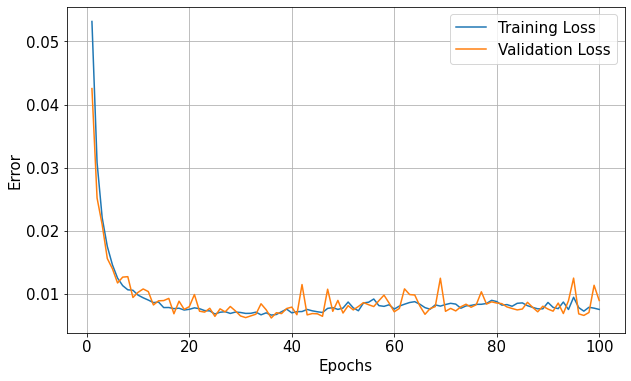

In [ ]:
# Plot Training Loss and Validation Loss

plt.figure(figsize=(10,6))
plt.plot(range(1, len(history.history['loss'])+1,1), history.history['loss'], label='Training Loss')
plt.plot(range(1, len(history.history['val_loss'])+1,1), history.history['val_loss'], label='Validation Loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid()

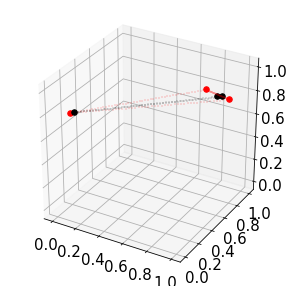

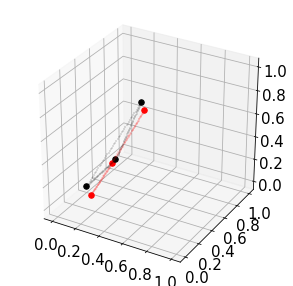

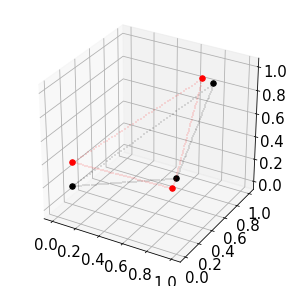

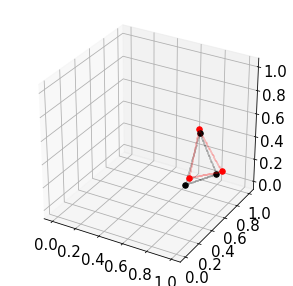

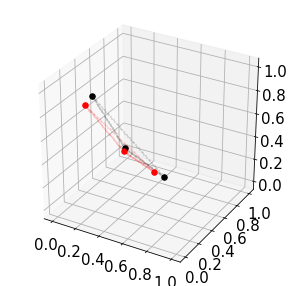

In [ ]:
# Reconstruct test images
reconstructed = autoencoder.predict(x_test)

for i in range(5):
    # Display original and reconstructed
    vx,vy,vz = np.array_split(x_test[i] , 3)
    vvx,vvy,vvz = np.array_split(reconstructed[i] , 3)
    Plot_2(vx,vy,vz,vvx,vvy,vvz)

## Layers 9-512-64-5-512-9


###Building the model

In [4]:
latent_dim = 5
input_img = Input(shape=(9,))

# Econder
x = Dense(9, activation='sigmoid')(input_img)

x = Dense(64, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)

encoded = Dense(latent_dim, activation='sigmoid')(x)

# Decoder
x = Dense(64, activation='relu')(encoded)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)

decoded = Dense(9, activation='sigmoid')(x)

# Model
autoencoder = Model(input_img, decoded)

# Visualise the model
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense (Dense)                (None, 9)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 512)               33280     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 325       
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

### Compiling the model

In [5]:
autoencoder.compile(optimizer='rmsprop', loss='mse', metrics =['accuracy'])

### Training the model

In [6]:
history = autoencoder.fit(x_train, x_train,     # For autoencoders input data = target data
                epochs=20,
                batch_size=64,
                validation_data=(x_val, x_val),
                verbose = 2
                )

NameError: ignored

### Evaluation

In [ ]:
# Plot Training Loss and Validation Loss

plt.figure(figsize=(10,6))
plt.plot(range(1, len(history.history['loss'])+1,1), history.history['loss'], label='Training Loss')
plt.plot(range(1, len(history.history['val_loss'])+1,1), history.history['val_loss'], label='Validation Loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid()

In [ ]:
# Reconstruct test images
reconstructed = autoencoder.predict(x_test)

for i in range(5):
    # Display original and reconstructed
    vx,vy,vz = np.array_split(x_test[i] , 3)
    vvx,vvy,vvz = np.array_split(reconstructed[i] , 3)
    Plot_2(vx,vy,vz,vvx,vvy,vvz)

## Layers 9-512-64-4-512-9


###Building the model

In [ ]:
latent_dim = 4
input_img = Input(shape=(9,))

# Econder
x = Dense(9, activation='sigmoid')(input_img)

x = Dense(64, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)

encoded = Dense(latent_dim, activation='sigmoid')(x)

# Decoder
x = Dense(64, activation='relu')(encoded)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)

decoded = Dense(9, activation='sigmoid')(x)

# Model
autoencoder = Model(input_img, decoded)

# Visualise the model
autoencoder.summary()

Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 9)]               0         
_________________________________________________________________
dense_102 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_103 (Dense)            (None, 64)                640       
_________________________________________________________________
dense_104 (Dense)            (None, 512)               33280     
_________________________________________________________________
dense_105 (Dense)            (None, 64)                32832     
_________________________________________________________________
dense_106 (Dense)            (None, 4)                 260       
_________________________________________________________________
dense_107 (Dense)            (None, 64)              

### Compiling the model

In [ ]:
autoencoder.compile(optimizer='rmsprop', loss='mse', metrics =['accuracy'])

### Training the model

In [ ]:
history = autoencoder.fit(x_train, x_train,     # For autoencoders input data = target data
                epochs=100,
                batch_size=64,
                validation_data=(x_val, x_val),
                verbose = 2
                )

Epoch 1/100
2500/2500 - 6s - loss: 0.0561 - accuracy: 0.3191 - val_loss: 0.0453 - val_accuracy: 0.3834
Epoch 2/100
2500/2500 - 6s - loss: 0.0406 - accuracy: 0.4078 - val_loss: 0.0365 - val_accuracy: 0.4073
Epoch 3/100
2500/2500 - 6s - loss: 0.0337 - accuracy: 0.4118 - val_loss: 0.0299 - val_accuracy: 0.4119
Epoch 4/100
2500/2500 - 6s - loss: 0.0301 - accuracy: 0.4197 - val_loss: 0.0284 - val_accuracy: 0.3938
Epoch 5/100
2500/2500 - 6s - loss: 0.0272 - accuracy: 0.4253 - val_loss: 0.0249 - val_accuracy: 0.4435
Epoch 6/100
2500/2500 - 6s - loss: 0.0246 - accuracy: 0.4483 - val_loss: 0.0240 - val_accuracy: 0.4586
Epoch 7/100
2500/2500 - 6s - loss: 0.0239 - accuracy: 0.4658 - val_loss: 0.0242 - val_accuracy: 0.4742
Epoch 8/100
2500/2500 - 6s - loss: 0.0225 - accuracy: 0.4776 - val_loss: 0.0218 - val_accuracy: 0.4861
Epoch 9/100
2500/2500 - 6s - loss: 0.0218 - accuracy: 0.4855 - val_loss: 0.0209 - val_accuracy: 0.5164
Epoch 10/100
2500/2500 - 6s - loss: 0.0218 - accuracy: 0.4887 - val_loss:

### Evaluation

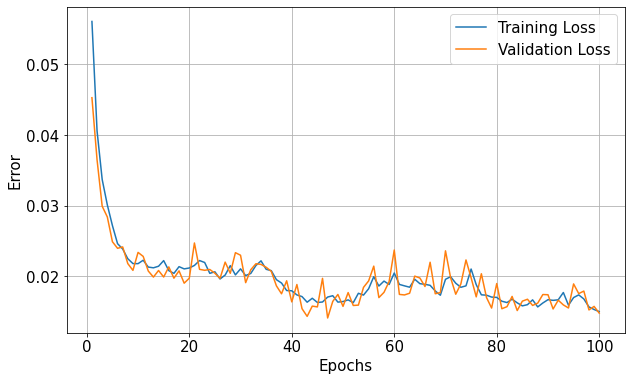

In [ ]:
# Plot Training Loss and Validation Loss

plt.figure(figsize=(10,6))
plt.plot(range(1, len(history.history['loss'])+1,1), history.history['loss'], label='Training Loss')
plt.plot(range(1, len(history.history['val_loss'])+1,1), history.history['val_loss'], label='Validation Loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid()

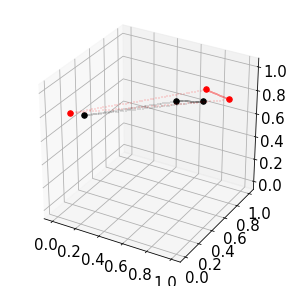

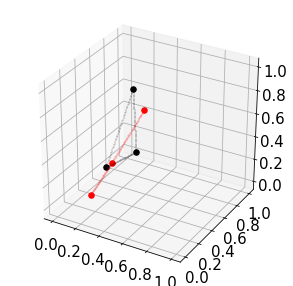

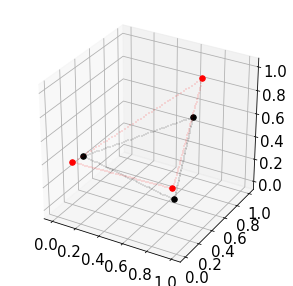

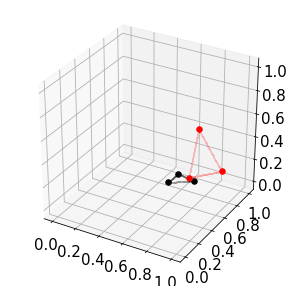

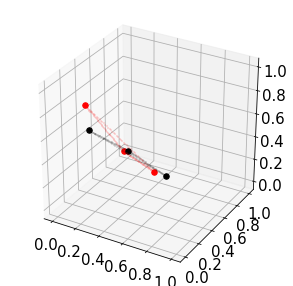

In [ ]:
# Reconstruct test images
reconstructed = autoencoder.predict(x_test)

for i in range(5):
    # Display original and reconstructed
    vx,vy,vz = np.array_split(x_test[i] , 3)
    vvx,vvy,vvz = np.array_split(reconstructed[i] , 3)
    Plot_2(vx,vy,vz,vvx,vvy,vvz)

## Layers 9-8192-7-8192-9


###Building the model

In [13]:
latent_dim = 7
input_img = Input(shape=(9,))

# Econder
x = Dense(9, activation='sigmoid')(input_img)

x = Dense(8192, activation='relu')(x)

encoded = Dense(latent_dim, activation='sigmoid')(x)

# Decoder
x = Dense(8192, activation='relu')(encoded)

decoded = Dense(9, activation='sigmoid')(x)

# Model
autoencoder = Model(input_img, decoded)

# Visualise the model
autoencoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_6 (Dense)              (None, 8192)              81920     
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 57351     
_________________________________________________________________
dense_8 (Dense)              (None, 8192)              65536     
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 73737     
Total params: 278,634
Trainable params: 278,634
Non-trainable params: 0
________________________________________________

### Compiling the model

In [14]:
autoencoder.compile(optimizer='adam', loss='mse', metrics =['accuracy'])

### Training the model

In [17]:
history = autoencoder.fit(x_train, x_train,     # For autoencoders input data = target data
                epochs=100,
                batch_size=128,
                validation_data=(x_val, x_val),
                verbose = 2
                )

Epoch 1/100
1250/1250 - 29s - loss: 0.0027 - accuracy: 0.7537 - val_loss: 0.0029 - val_accuracy: 0.7536
Epoch 2/100
1250/1250 - 30s - loss: 0.0027 - accuracy: 0.7587 - val_loss: 0.0029 - val_accuracy: 0.7604
Epoch 3/100
1250/1250 - 30s - loss: 0.0028 - accuracy: 0.7485 - val_loss: 0.0029 - val_accuracy: 0.7484
Epoch 4/100
1250/1250 - 30s - loss: 0.0028 - accuracy: 0.7515 - val_loss: 0.0027 - val_accuracy: 0.7583
Epoch 5/100
1250/1250 - 30s - loss: 0.0028 - accuracy: 0.7535 - val_loss: 0.0028 - val_accuracy: 0.7627
Epoch 6/100
1250/1250 - 30s - loss: 0.0028 - accuracy: 0.7568 - val_loss: 0.0026 - val_accuracy: 0.7631
Epoch 7/100
1250/1250 - 30s - loss: 0.0027 - accuracy: 0.7568 - val_loss: 0.0027 - val_accuracy: 0.7623
Epoch 8/100
1250/1250 - 32s - loss: 0.0027 - accuracy: 0.7565 - val_loss: 0.0026 - val_accuracy: 0.7707
Epoch 9/100
1250/1250 - 30s - loss: 0.0027 - accuracy: 0.7575 - val_loss: 0.0027 - val_accuracy: 0.7523
Epoch 10/100
1250/1250 - 30s - loss: 0.0027 - accuracy: 0.7580 -

### Evaluation

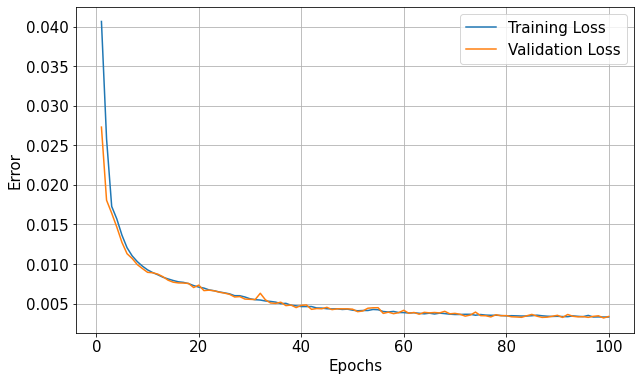

In [12]:
# Plot Training Loss and Validation Loss

plt.figure(figsize=(10,6))
plt.plot(range(1, len(history.history['loss'])+1,1), history.history['loss'], label='Training Loss')
plt.plot(range(1, len(history.history['val_loss'])+1,1), history.history['val_loss'], label='Validation Loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid()

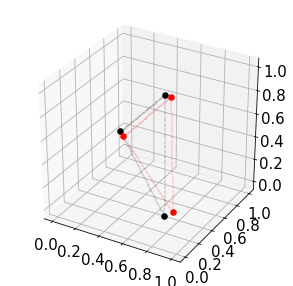

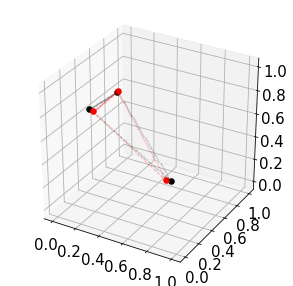

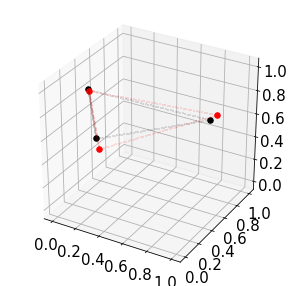

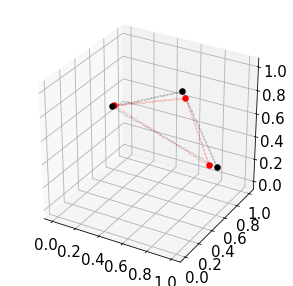

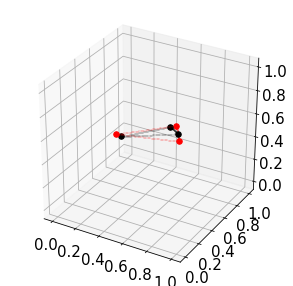

In [11]:
# Reconstruct test images
reconstructed = autoencoder.predict(x_test)

for i in range(5):
    # Display original and reconstructed
    vx,vy,vz = np.array_split(x_test[i] , 3)
    vvx,vvy,vvz = np.array_split(reconstructed[i] , 3)
    Plot_2(vx,vy,vz,vvx,vvy,vvz)

## Layers 9-8192-6-8192-9


###Building the model

In [10]:
latent_dim = 6
input_img = Input(shape=(9,))

# Econder
x = Dense(9, activation='sigmoid')(input_img)

x = Dense(8192, activation='relu')(x)

encoded = Dense(latent_dim, activation='sigmoid')(x)

# Decoder
x = Dense(8192, activation='relu')(encoded)

decoded = Dense(9, activation='sigmoid')(x)

# Model
autoencoder = Model(input_img, decoded)

# Visualise the model
autoencoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_10 (Dense)             (None, 8192)              81920     
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 49158     
_________________________________________________________________
dense_12 (Dense)             (None, 8192)              57344     
_________________________________________________________________
dense_13 (Dense)             (None, 9)                 73737     
Total params: 262,249
Trainable params: 262,249
Non-trainable params: 0
________________________________________________

### Compiling the model

In [11]:
autoencoder.compile(optimizer='adam', loss='mse', metrics =['accuracy'])

### Training the model

In [17]:
history = autoencoder.fit(x_train, x_train,     # For autoencoders input data = target data
                epochs=100,
                batch_size=128,
                validation_data=(x_val, x_val),
                verbose = 2
                )

Epoch 1/100
1250/1250 - 27s - loss: 0.0047 - accuracy: 0.6789 - val_loss: 0.0050 - val_accuracy: 0.6876
Epoch 2/100
1250/1250 - 27s - loss: 0.0048 - accuracy: 0.6929 - val_loss: 0.0048 - val_accuracy: 0.6912
Epoch 3/100
1250/1250 - 27s - loss: 0.0048 - accuracy: 0.6914 - val_loss: 0.0046 - val_accuracy: 0.7060
Epoch 4/100
1250/1250 - 28s - loss: 0.0047 - accuracy: 0.6889 - val_loss: 0.0045 - val_accuracy: 0.6795
Epoch 5/100
1250/1250 - 27s - loss: 0.0048 - accuracy: 0.6853 - val_loss: 0.0046 - val_accuracy: 0.6783
Epoch 6/100
1250/1250 - 28s - loss: 0.0049 - accuracy: 0.6916 - val_loss: 0.0052 - val_accuracy: 0.6761
Epoch 7/100
1250/1250 - 27s - loss: 0.0047 - accuracy: 0.6895 - val_loss: 0.0047 - val_accuracy: 0.6941
Epoch 8/100
1250/1250 - 27s - loss: 0.0047 - accuracy: 0.6833 - val_loss: 0.0048 - val_accuracy: 0.6909
Epoch 9/100
1250/1250 - 28s - loss: 0.0047 - accuracy: 0.6907 - val_loss: 0.0046 - val_accuracy: 0.6910
Epoch 10/100
1250/1250 - 27s - loss: 0.0048 - accuracy: 0.6812 -

### Evaluation

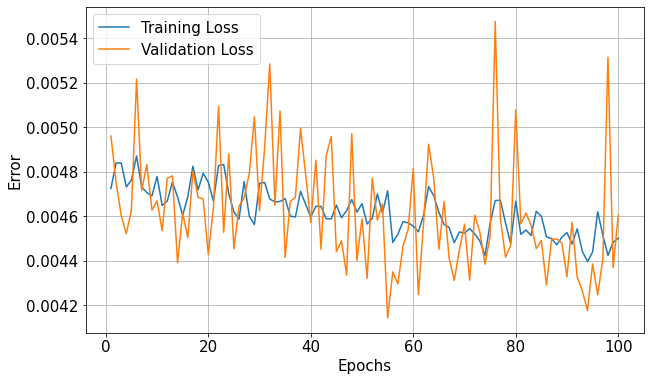

In [18]:
# Plot Training Loss and Validation Loss

plt.figure(figsize=(10,6))
plt.plot(range(1, len(history.history['loss'])+1,1), history.history['loss'], label='Training Loss')
plt.plot(range(1, len(history.history['val_loss'])+1,1), history.history['val_loss'], label='Validation Loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.grid()

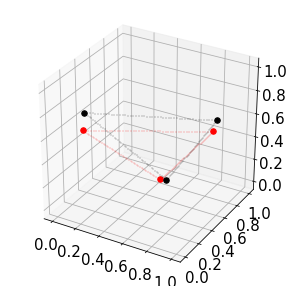

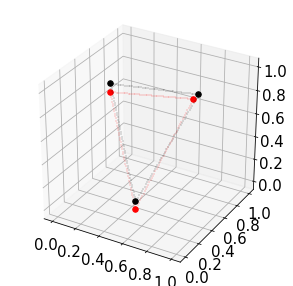

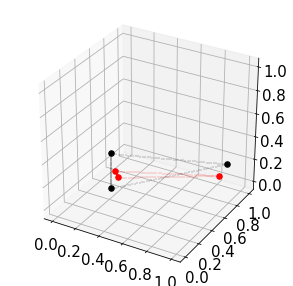

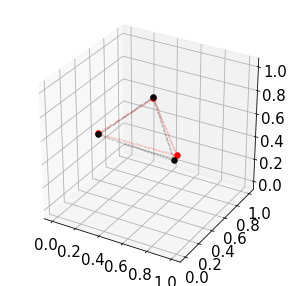

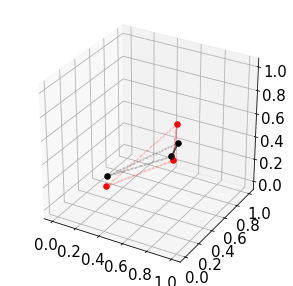

In [20]:
# Reconstruct test images
reconstructed = autoencoder.predict(x_test)

for i in range(5):
    # Display original and reconstructed
    vx,vy,vz = np.array_split(x_test[i] , 3)
    vvx,vvy,vvz = np.array_split(reconstructed[i] , 3)
    Plot_2(vx,vy,vz,vvx,vvy,vvz)